<a href="https://colab.research.google.com/github/JoshOlu/data602/blob/main/timeSeriesHW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()
#upload Employment Data, change name below if it is not named: SMU36935616562440001.csv

Saving SMU36935616562440001.csv to SMU36935616562440001.csv


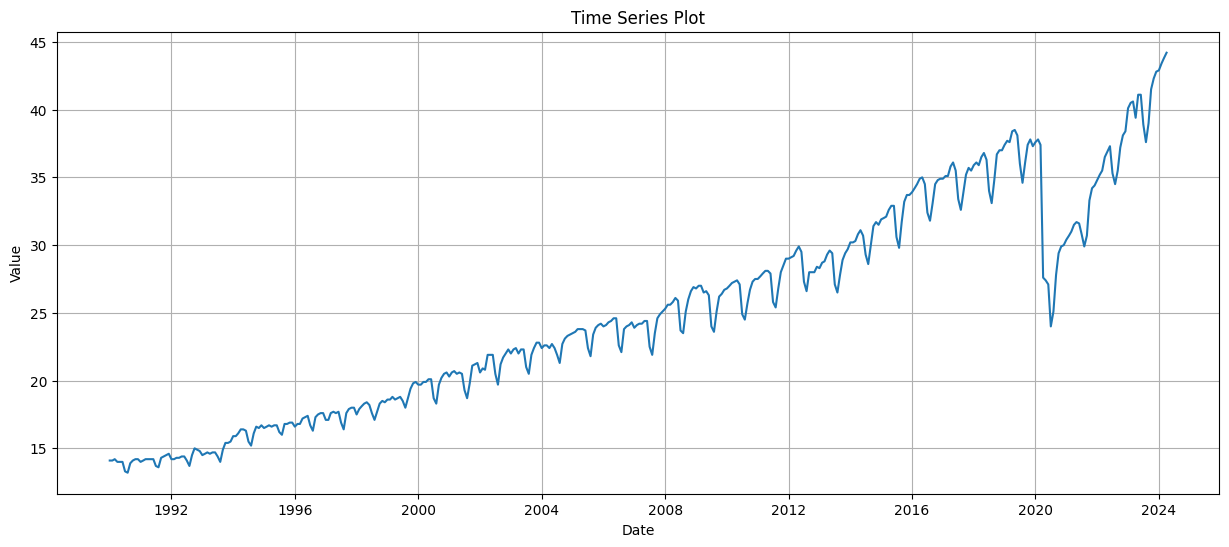

In [2]:
##########      QUESTION A     ##########
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import STL

df = pd.read_csv('SMU36935616562440001.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

plt.figure(figsize=(15, 6))
plt.plot(df)
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

Looking at this plot, there is a steady upward trend from around 1990 to 2020. There does seem to be a form of seasonality. More specifically, from April to September (Late Spring - Summer), there seems to be a dip in employment every year. In terms of COVID, it had a huge impacy on employment in 2020 through 2023. In 2020, employment rates dropped to rates that weren't seen since 2009-2010. After COVID, the trend seems to be steeper and stronger than pre-COVID.

In [3]:
##########      QUESTION B     ##########
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

print("ADF Test Results:")
adf_test(df['SMU36935616562440001'])

ADF Test Results:
ADF Statistic: 0.307253200581767
p-value: 0.9776748225226093
Critical values:
	1%: -3.447
	5%: -2.869
	10%: -2.571


Looking at the graph, the time series is not stationary. It has a steady upward trend. Stationary would suggest that the mean stays the same for long-term. Using the augmented Dickey-Fuller test, we verify my assuption. The DF test has a statistic of 0.307. This value is higher than all of our calculated critical values, which suggests that the time series is non-stationary.

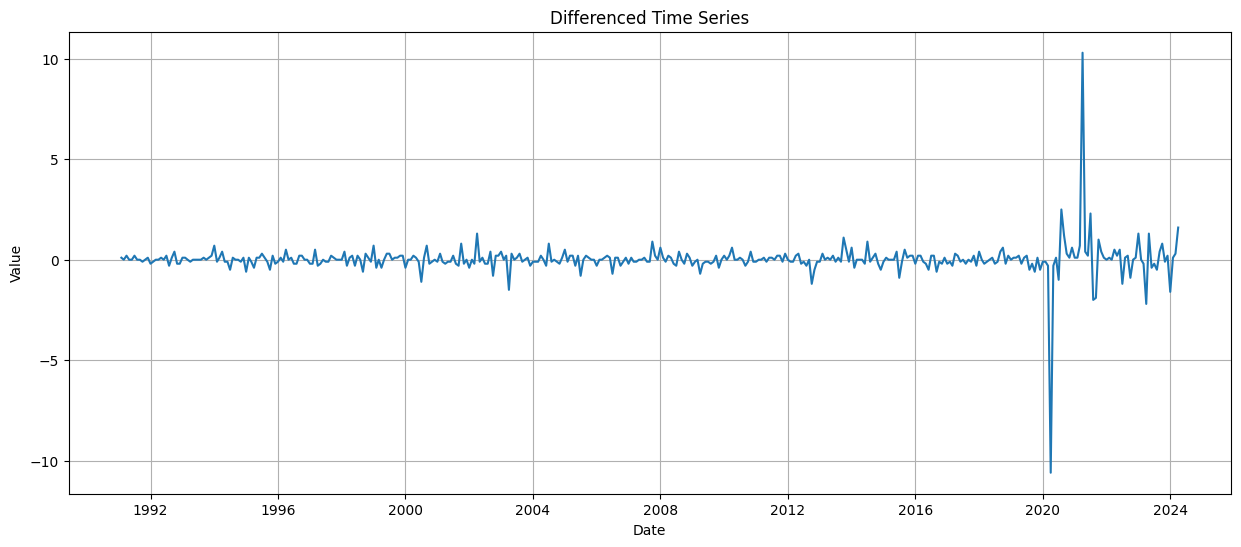


ADF Test on Differenced Data:
ADF Statistic: -9.162244318246811
p-value: 2.5147966936676514e-15
Critical values:
	1%: -3.447
	5%: -2.869
	10%: -2.571


In [4]:
##########      QUESTION C     ##########
seasonal_diff = df.diff(12)
final_diff = seasonal_diff.diff(1)

plt.figure(figsize=(15, 6))
plt.plot(final_diff)
plt.title('Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

print("\nADF Test on Differenced Data:")
adf_test(final_diff.dropna())

Looking at the graph, the time series is stationary. It has a steady horizontal trend and has a mean centered around 0. Using the augmented Dickey-Fuller test, we verify my assuption. The DF test has a statistic of -9.162. This value is significantly lower than all of our calculated critical values, which suggests that the time series is stationary.

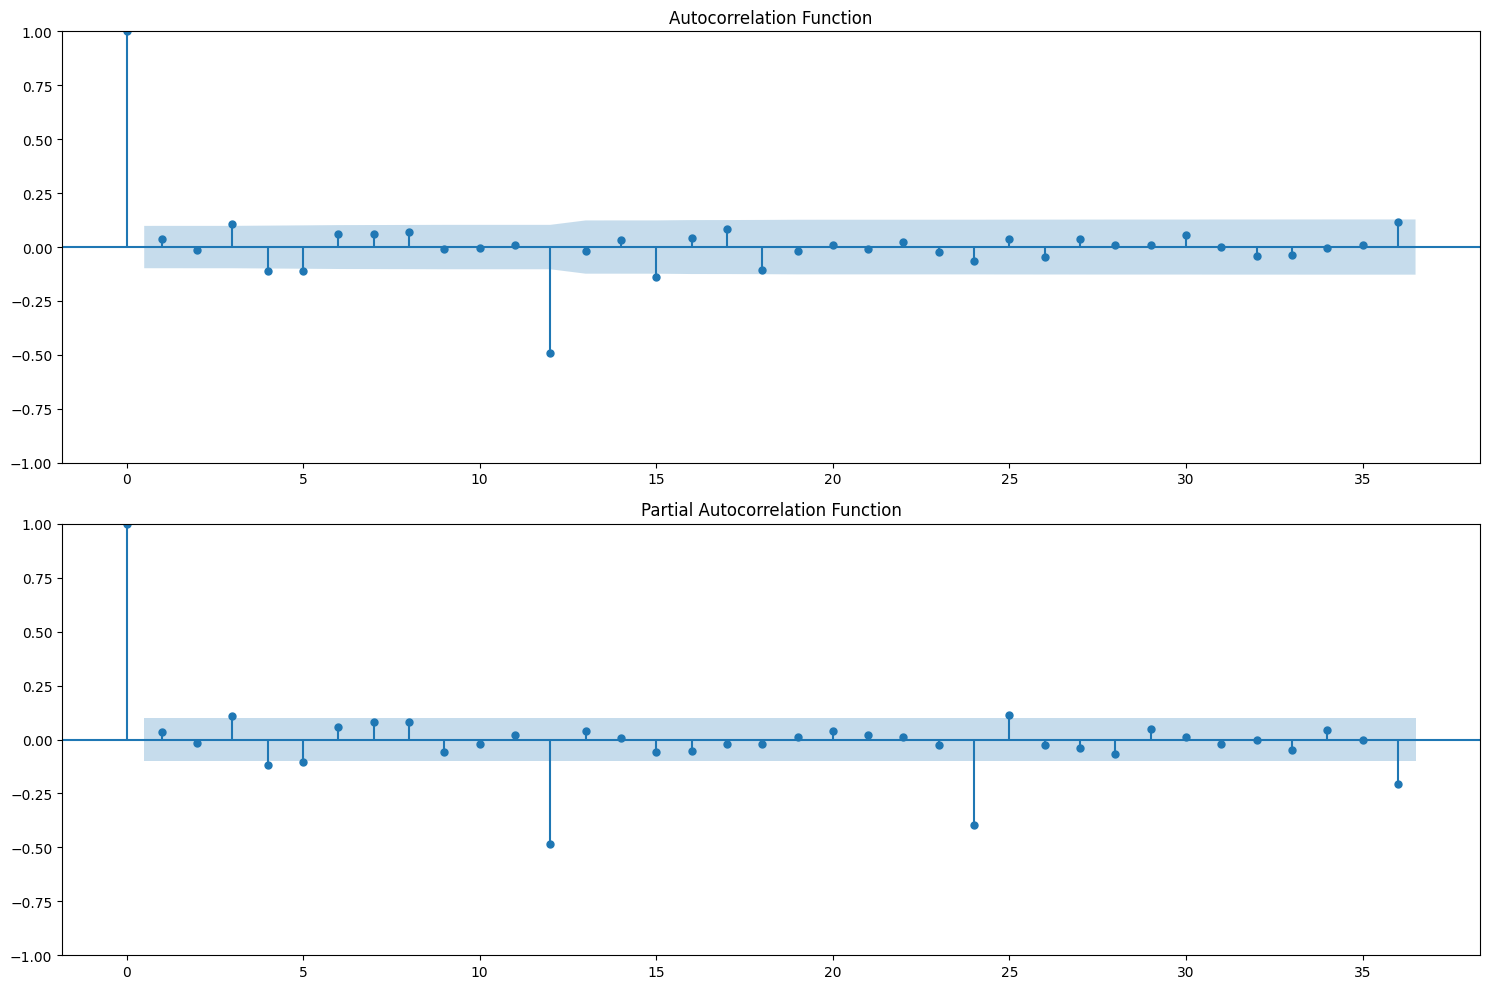

In [5]:
##########      QUESTION D     ##########
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
plot_acf(final_diff.dropna(), lags=36, ax=ax1)
ax1.set_title('Autocorrelation Function')
plot_pacf(final_diff.dropna(), lags=36, ax=ax2)
ax2.set_title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

Looking at the graph, there seems to be a significant correlation for lag 12 for both autocorrelation and partial autocorrelation. Lag 12 would suggest a seasonal pattern with an annual frequency. The correlation is negative. The same could be said for lag 24 of the parital autocorrelation function.

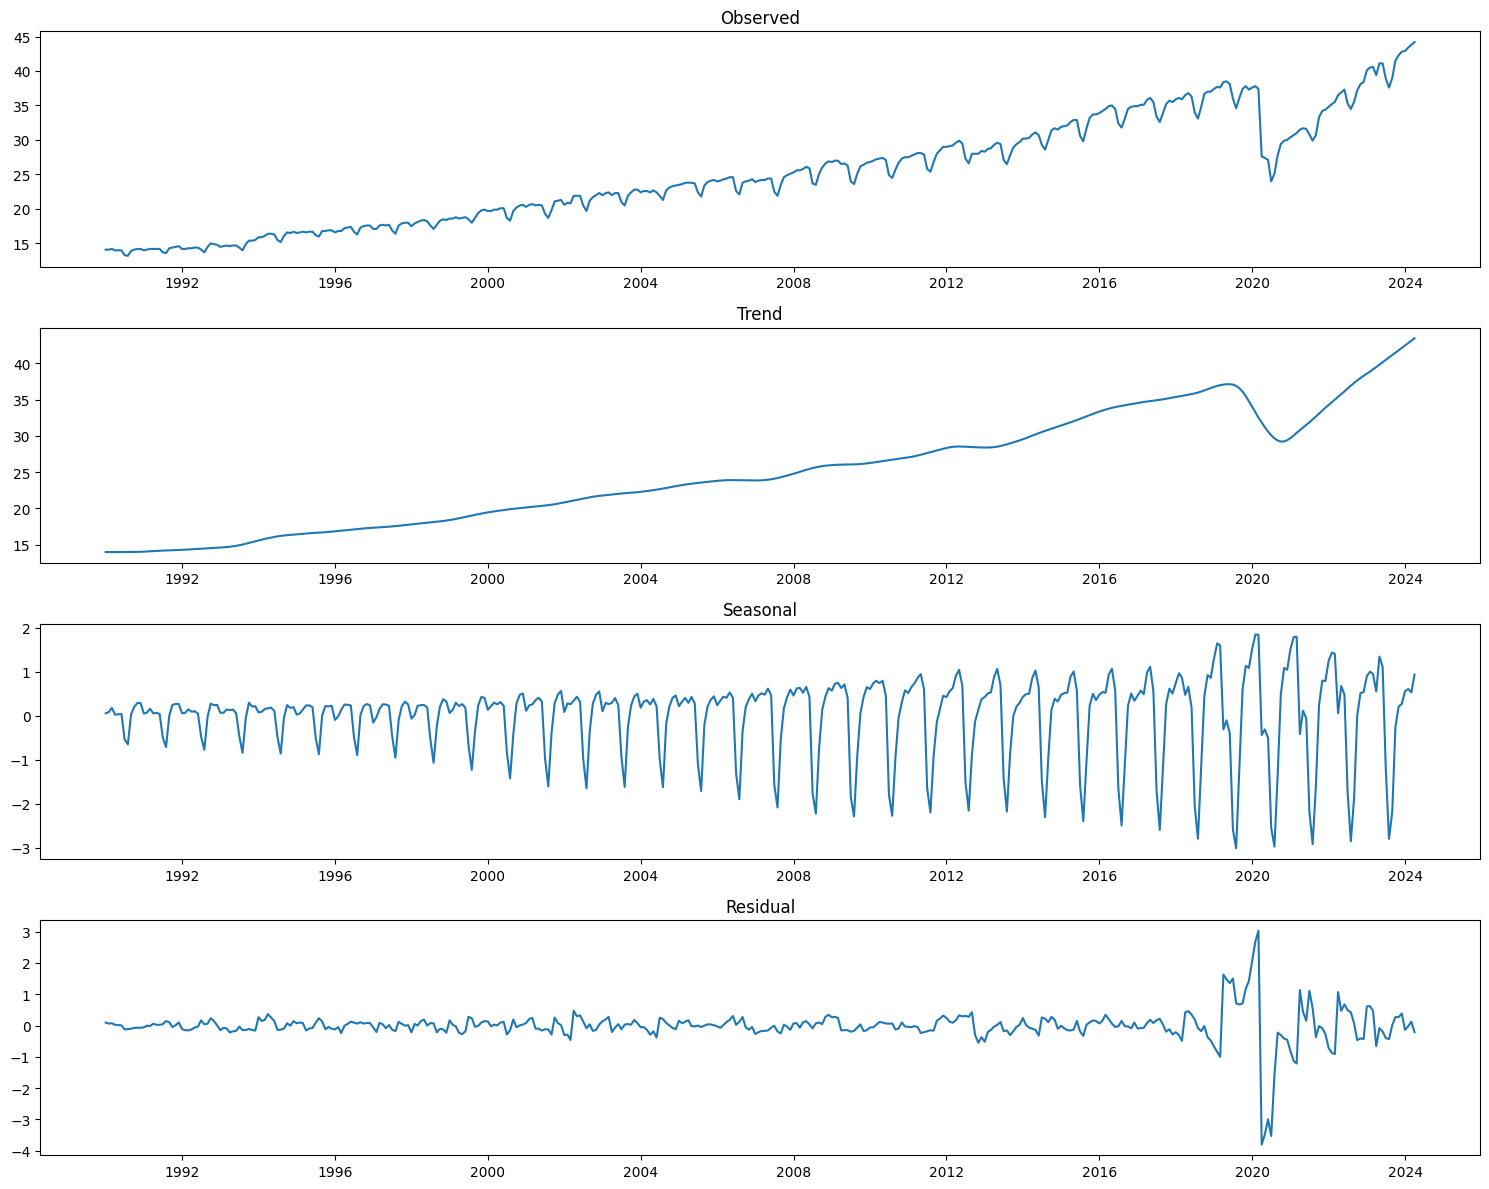

In [6]:
##########      QUESTION E     ##########
stl = STL(df, period=12)
result = stl.fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))
ax1.plot(result.observed)
ax1.set_title('Observed')
ax2.plot(result.trend)
ax2.set_title('Trend')
ax3.plot(result.seasonal)
ax3.set_title('Seasonal')
ax4.plot(result.resid)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

Looking at these graphs, the plot for the observed data (original data) is consistent with my impressions from step a. The same could be said for the trend plot as well. The seasonal plot shows the consistent annual dips in the months between April and September. The pattern seems to be more pronounced starting in 2020, at the start of COVID. The residual plot is very similar to the differenced time series plot, where the time series is stationary until 2020.